In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("SuperStore_Orders.csv",encoding='latin-1')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [11]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,04-01-2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [12]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
df.shape

(51290, 21)

In [8]:
df.size

1077090

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [13]:
df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


In [14]:
df['order_date']=df['order_date'].astype('datetime64[ns]')
df['ship_date']=df['ship_date'].astype('datetime64[ns]')
df['sales']=pd.to_numeric(df['sales'], errors='coerce')

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16-01-2011' in DD/MM/YYYY format. Provide format or specif

In [15]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [16]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [18]:
df['sales'].mean()

161.01783806000822

In [19]:
df['sales'].median()

77.0

In [20]:
df['sales'].mode()

0    13.0
Name: sales, dtype: float64

In [21]:
df['sales'].std()

201.0925185112189

In [23]:
df=df.dropna()

In [24]:
df.shape

(48660, 21)

In [25]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [26]:
df.nunique()

order_id          24386
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1088
country             147
market                7
region               13
product_id        10051
category              3
sub_category         17
product_name       3742
sales               993
quantity             14
discount             27
profit            22549
shipping_cost      8011
order_priority        4
year                  4
dtype: int64

In [27]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,161.017838,3.350658,0.145722,14.688249,17.593780,2012.777579
std,201.092519,2.198216,0.215066,86.825672,28.559365,1.098732
min,0.000000,1.000000,0.000000,-1924.542000,0.000000,2011.000000
25%,29.000000,2.000000,0.000000,0.000000,2.450000,2012.000000
50%,77.000000,3.000000,0.000000,8.460000,7.030000,2013.000000
75%,208.000000,4.000000,0.200000,31.154400,20.152500,2014.000000
max,999.000000,14.000000,0.850000,486.600000,427.100000,2014.000000


In [30]:
df['country'].value_counts()[0:10]

United States     9523
France            2626
Australia         2623
Mexico            2514
Germany           1928
China             1696
Brazil            1530
United Kingdom    1512
India             1411
Turkey            1367
Name: country, dtype: int64

### Segment

In [35]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [31]:
df['segment'].value_counts()

Consumer       25185
Corporate      14629
Home Office     8846
Name: segment, dtype: int64

<AxesSubplot:xlabel='segment', ylabel='count'>

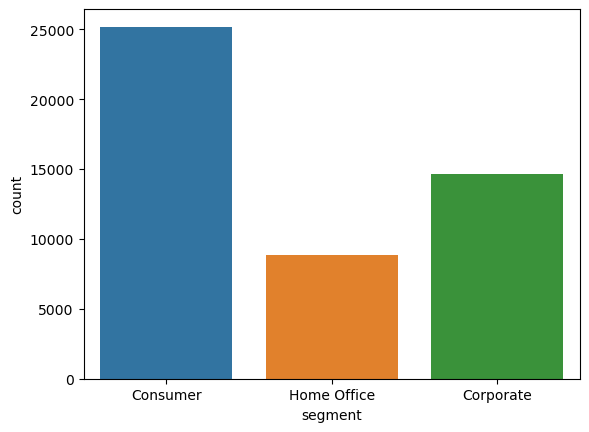

In [84]:
sns.countplot(x=df['segment'])

### State

In [37]:
df['state'].unique()

array(['Constantine', 'New South Wales', 'Budapest', ..., 'Setúbal',
       'Karaman', 'Atsimo-Andrefana'], dtype=object)

In [40]:
df['state'].value_counts()[0:10]

California                1901
England                   1388
New York                  1060
Texas                      959
Ile-de-France              900
New South Wales            715
North Rhine-Westphalia     670
Queensland                 659
San Salvador               586
Pennsylvania               565
Name: state, dtype: int64

<AxesSubplot:ylabel='state'>

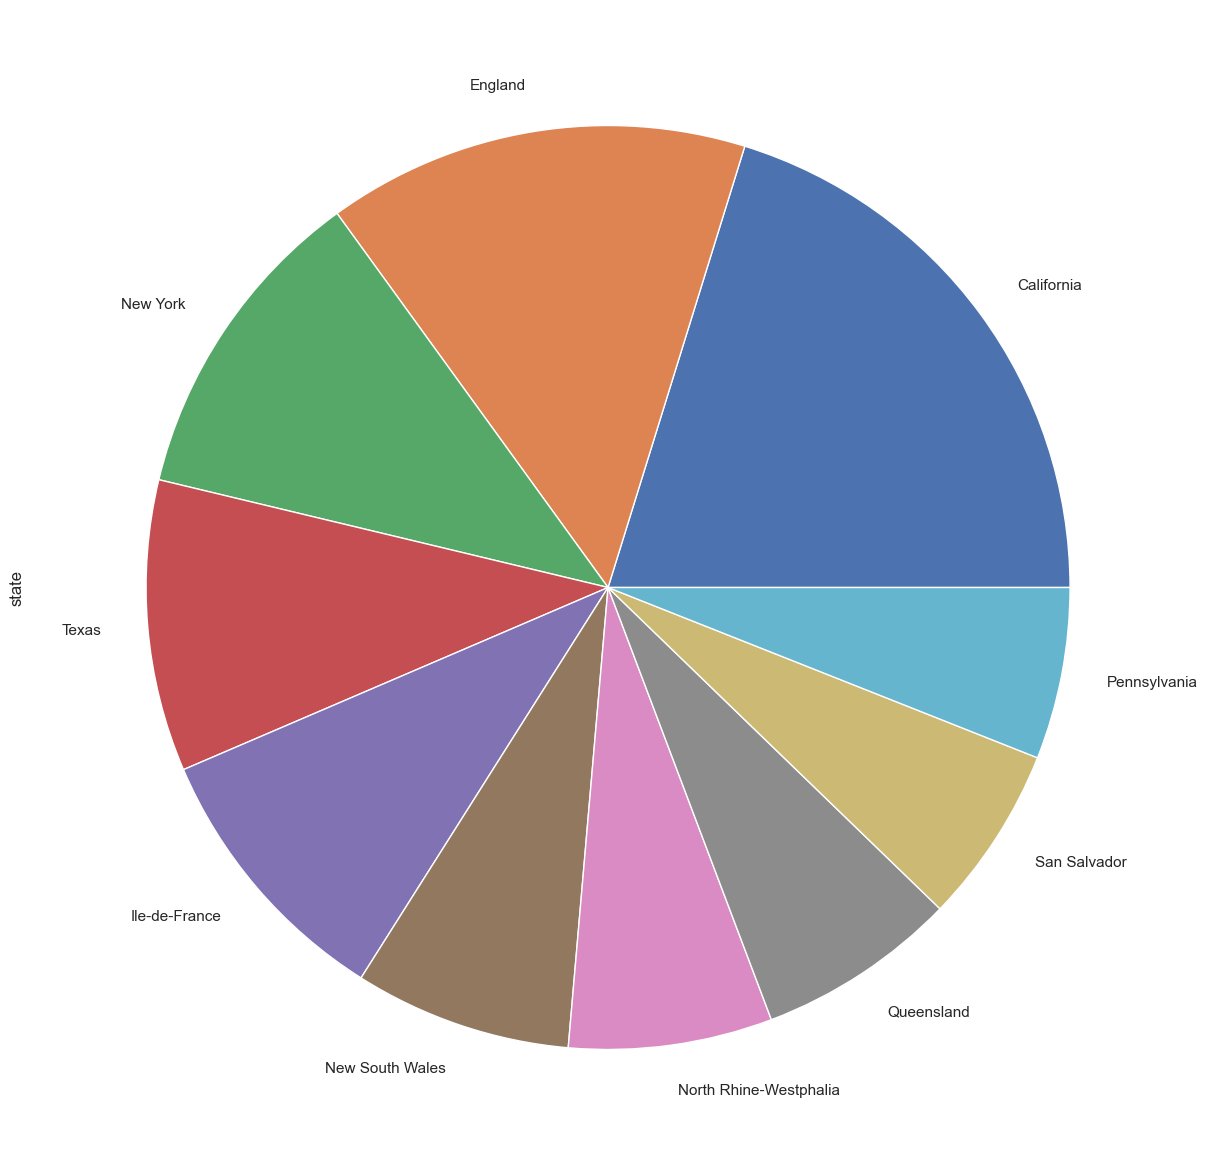

In [96]:
plt.figure(figsize=(20,15))
df['state'].value_counts().head(10).plot.pie()

### Country

In [41]:
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Mexico', 'Cuba',
       'France', 'Brazil', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'Denmark',
       'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia', 'Mongolia',
       'Belgium', 'Kenya', 'El Salvador', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [48]:
df['country'].value_counts()[0:10]

United States     9523
France            2626
Australia         2623
Mexico            2514
Germany           1928
China             1696
Brazil            1530
United Kingdom    1512
India             1411
Turkey            1367
Name: country, dtype: int64

Text(0, 0.5, 'Countries')

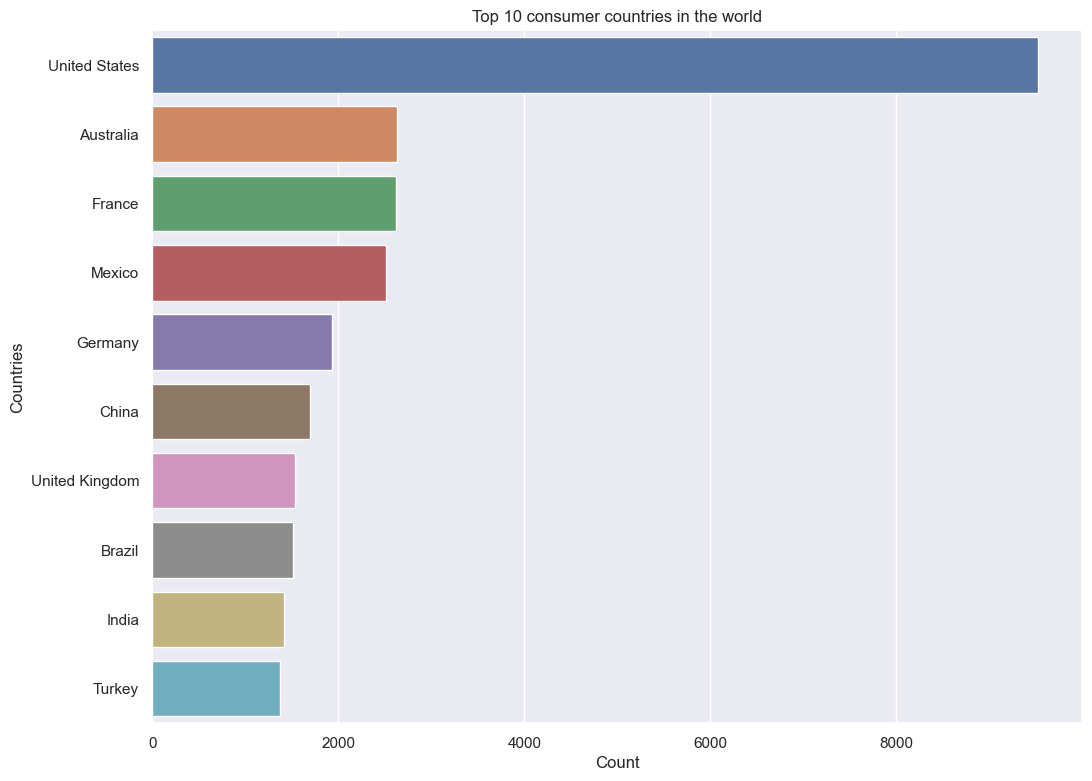

In [107]:
l1=["United States","Australia","France","Mexico","Germany","China","United Kingdom","Brazil","India","Turkey"]
l2=[9523,2626,2623,2514,1928,1696,1530,1512,1411,1367]
sns.barplot(x=l2, y=l1)
# sns.set_theme(style='darkgrid')
plt.title("Top 10 consumer countries in the world")
plt.xlabel('Count')
plt.ylabel('Countries')

In [ ]:
lq

### Market

In [49]:
df['market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [50]:
df['market'].value_counts()

APAC      10152
LATAM      9920
US         9523
EU         9351
EMEA       4891
Africa     4448
Canada      375
Name: market, dtype: int64

### Region

In [51]:
df['region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'Caribbean', 'South', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [52]:
df['region'].value_counts()

Central           10543
South              6340
EMEA               4891
North              4520
Africa             4448
Oceania            3238
West               3043
Southeast Asia     2926
East               2705
North Asia         2121
Central Asia       1867
Caribbean          1643
Canada              375
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

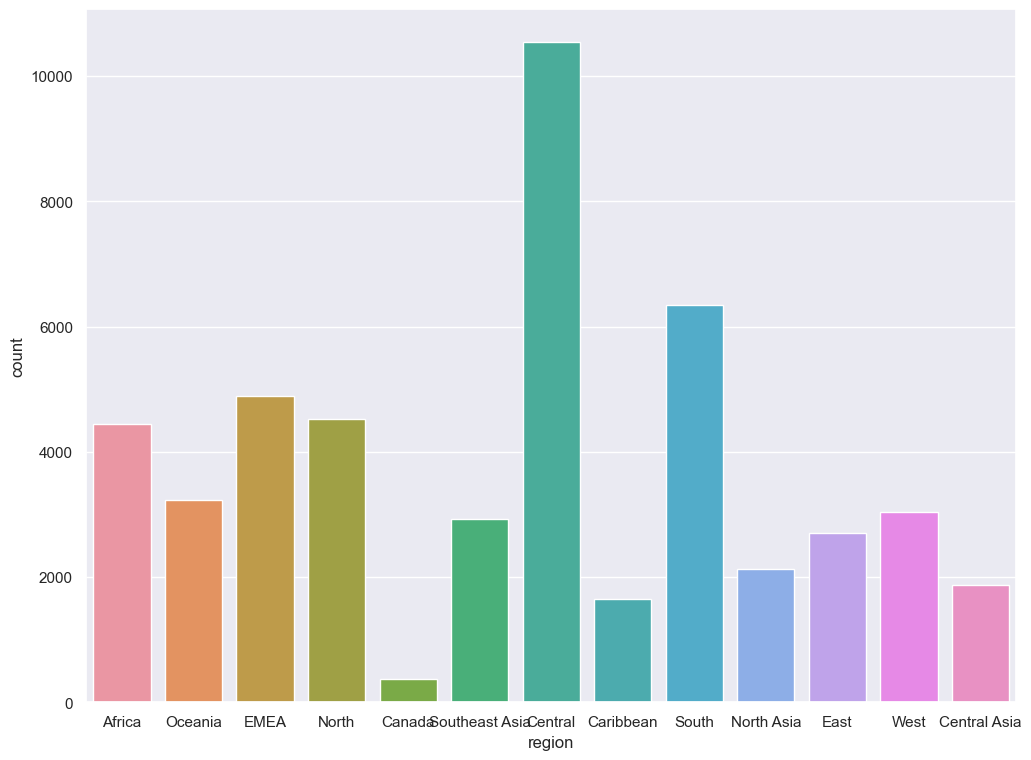

In [90]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x=df['region'])

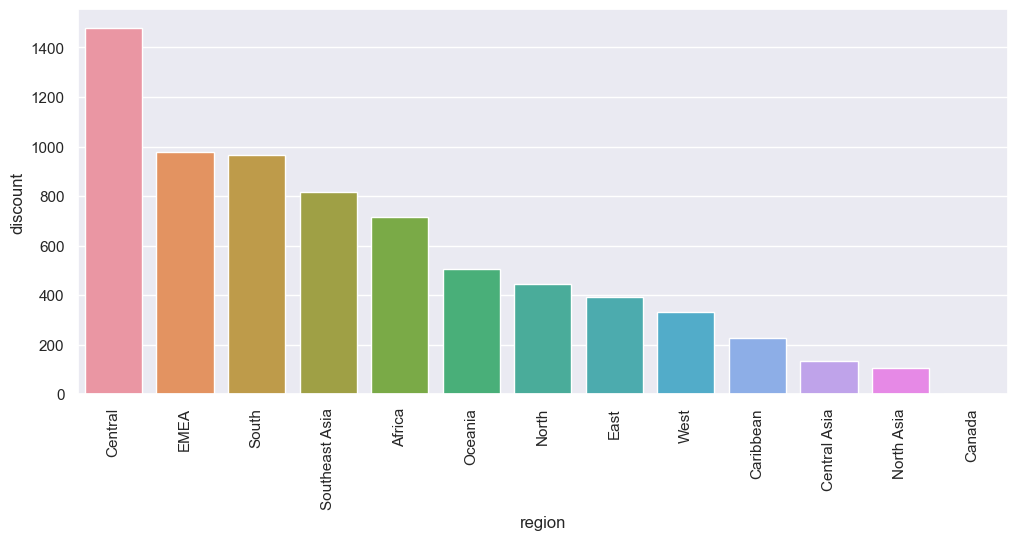

In [158]:
regions= df.groupby(['region']).sum().sort_values('discount', ascending=False)
regions.reset_index(inplace=True)
plt.figure(figsize=(12,5))


sns.barplot(x='region', y='discount', data=regions)
plt.xticks(rotation=90)
plt.show();

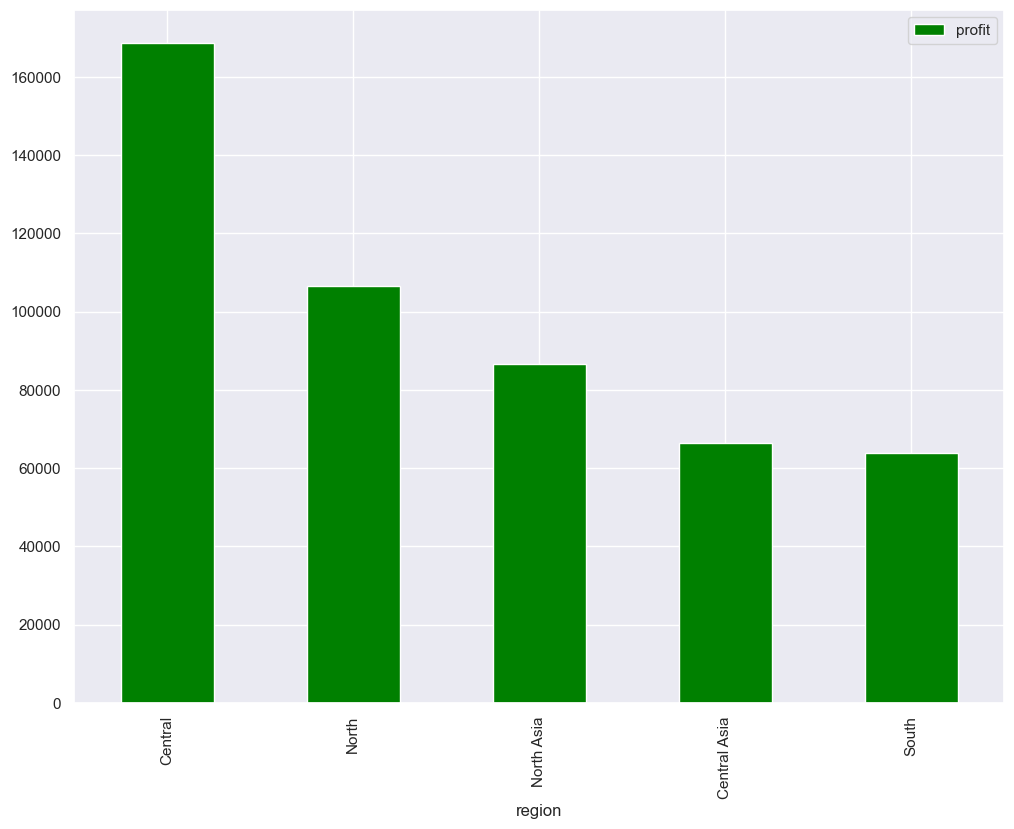

In [159]:
df.groupby(['region']).sum()[['profit']].sort_values(by="profit",ascending=False).nlargest(n=5, columns=['profit']).plot.bar(color="green")
plt.show()

### Category

In [53]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [54]:
df['category'].value_counts()

Office Supplies    30736
Technology          9018
Furniture           8906
Name: category, dtype: int64

### Sub-categori

In [59]:
df['sub_category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [60]:
df['sub_category'].value_counts()

Binders        6108
Storage        4903
Art            4882
Paper          3538
Furnishings    3163
Chairs         3105
Accessories    2956
Phones         2950
Labels         2606
Envelopes      2435
Fasteners      2420
Supplies       2417
Bookcases      2031
Copiers        1810
Appliances     1427
Machines       1302
Tables          607
Name: sub_category, dtype: int64

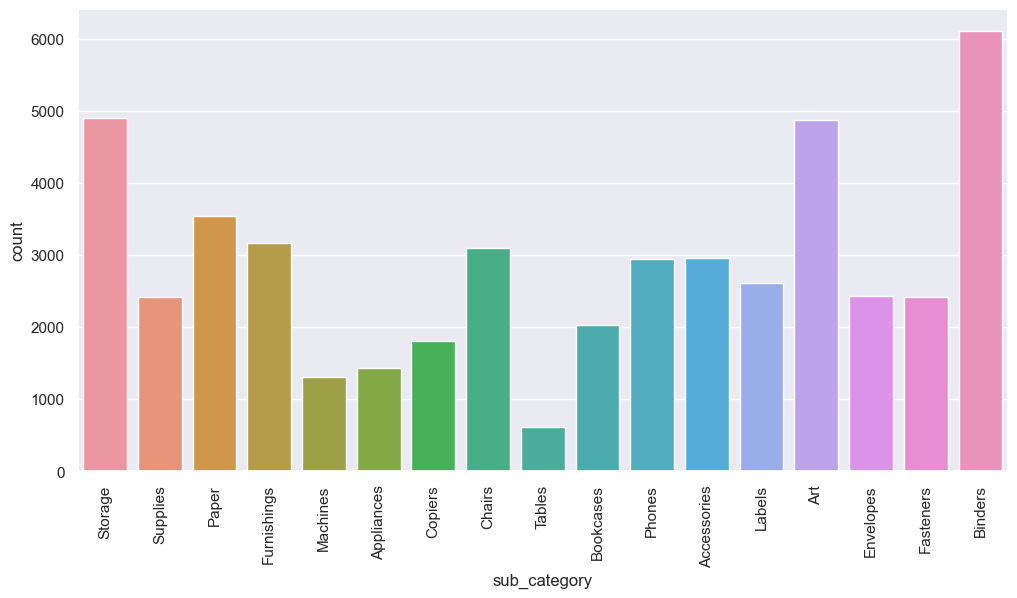

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['sub_category'])
plt.xticks(rotation=90)
plt.show()

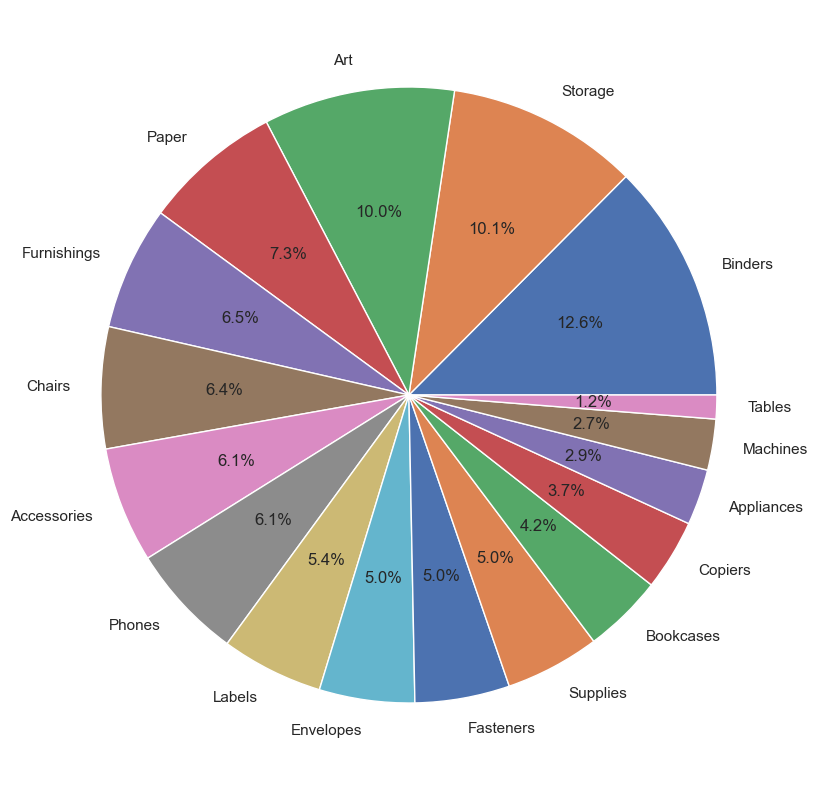

In [95]:
plt.figure(figsize=(12,10))
plt.pie(df['sub_category'].value_counts(), labels=df["sub_category"].value_counts().keys(), autopct="%0.1f%%")
plt.show()

### Sales

In [63]:
df['sales'].sum()

7835128.0

### Order Priority

In [80]:
df['order_priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [81]:
df['order_priority'].value_counts()

Medium      27934
High        14697
Critical     3711
Low          2318
Name: order_priority, dtype: int64

### Ship Mode

In [144]:
df['ship_mode'].value_counts()

Standard Class    29202
Second Class       9789
First Class        7121
Same Day           2548
Name: ship_mode, dtype: int64

<AxesSubplot:ylabel='ship_mode'>

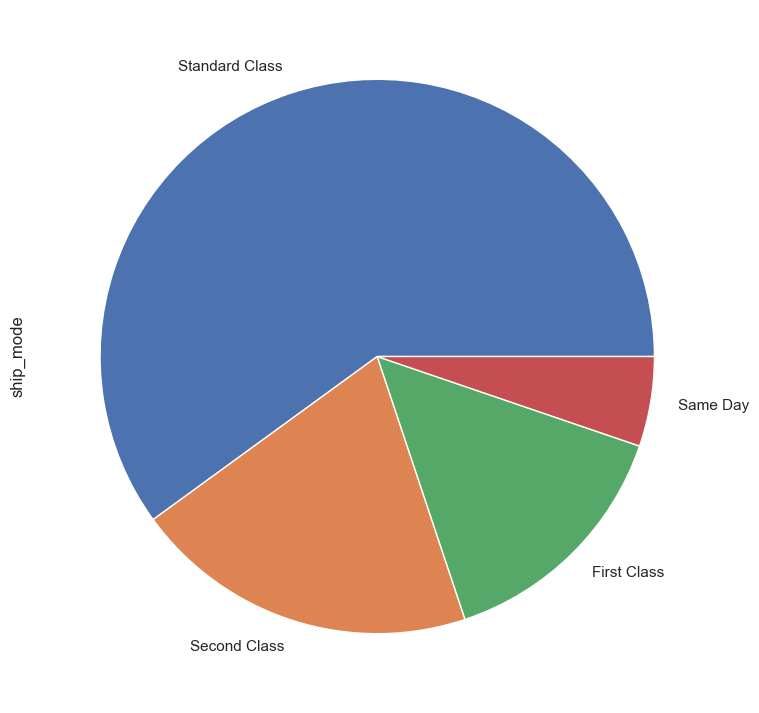

In [147]:
df['ship_mode'].value_counts().plot.pie()

### Year

In [108]:
df['year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [109]:
df['year'].value_counts()

2014    16636
2013    13092
2012    10405
2011     8527
Name: year, dtype: int64

In [121]:
df_2011=df[df['year']==2011]
df_2011['quantity'].sum()



28763

In [122]:
df_2012=df[df['year']==2012]
df_2012['quantity'].sum()


34899

In [123]:
df_2013=df[df['year']==2013]
df_2013['quantity'].sum()


44041

In [124]:
df_2014=df[df['year']==2014]
df_2014['quantity'].sum()


55340

Text(0.5, 1.0, 'Growth of the Store')

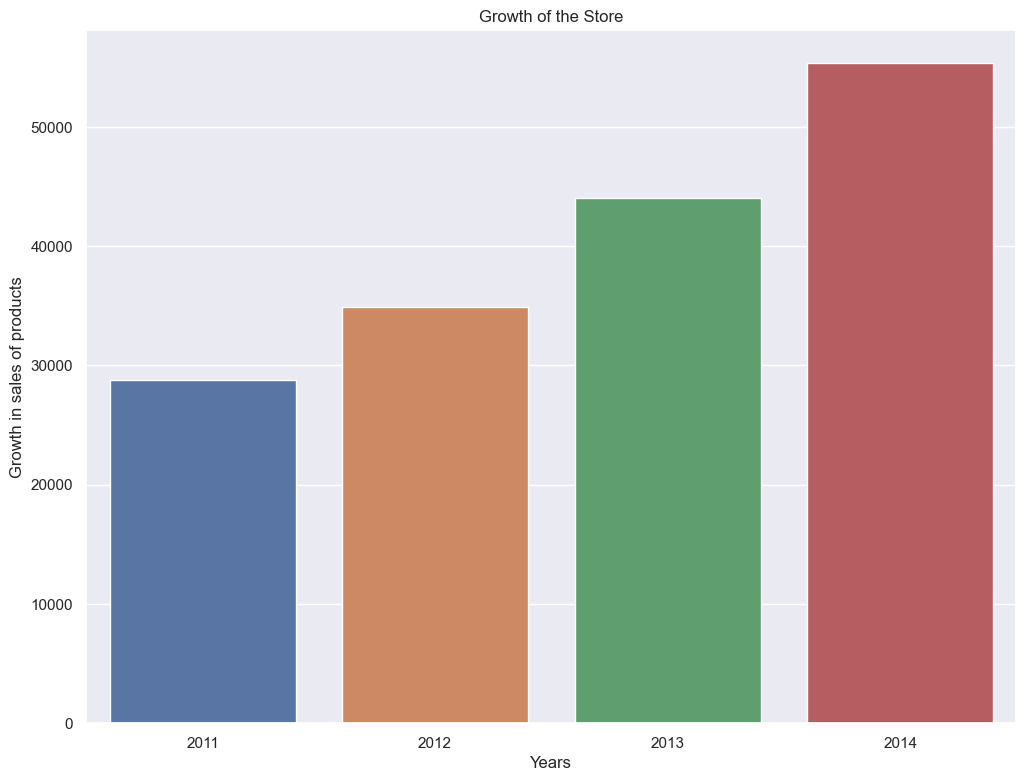

In [128]:
y1=[2011,2012,2013,2014]
q1=[28763,34899,44041,55340]
sns.barplot(x=y1,y=q1)
plt.xlabel("Years")
plt.ylabel("Growth in sales of products")
plt.title("Growth of the Store")

In [83]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1,0.0,0.5600,0.20,Medium,2014


### Profit

In [133]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [132]:
df['profit'].value_counts()

 0.0000     638
 4.3200      70
 3.9600      69
 7.9200      67
 2.6400      63
           ... 
 13.2522      1
-9.5280       1
-1.3995       1
 37.1400      1
-0.6048       1
Name: profit, Length: 22549, dtype: int64

Text(0, 0.5, 'In millions')

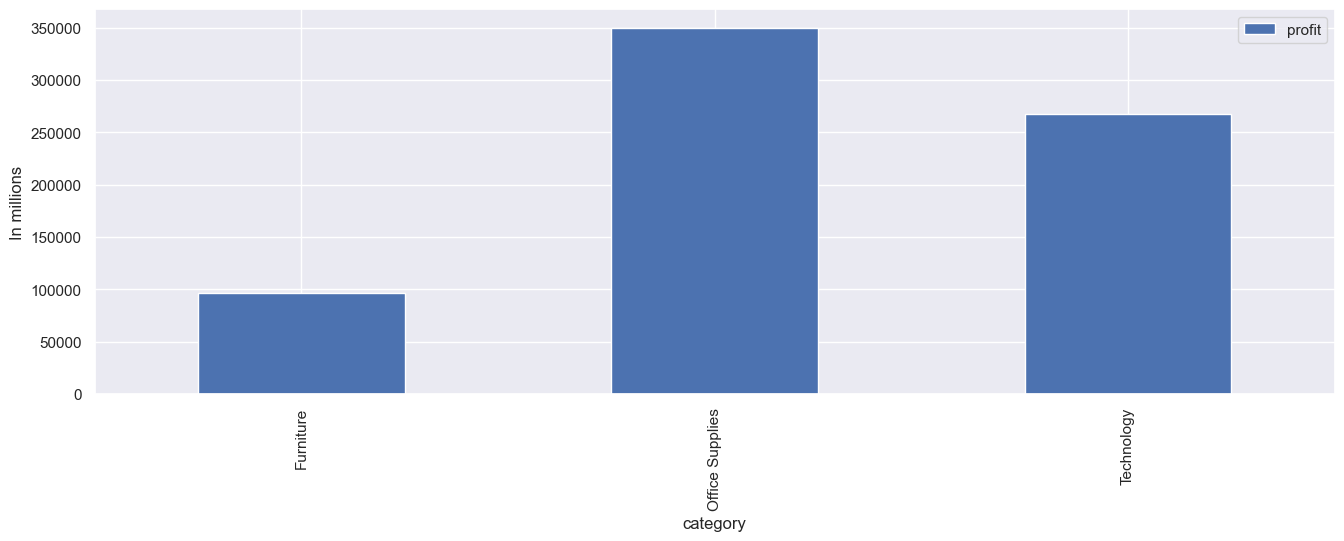

In [135]:
profits_category = df.groupby('category').sum()[['profit']]
profits_category.plot(kind='bar',figsize=(16,5))
plt.ylabel("In millions")

Text(0, 0.5, 'In millions')

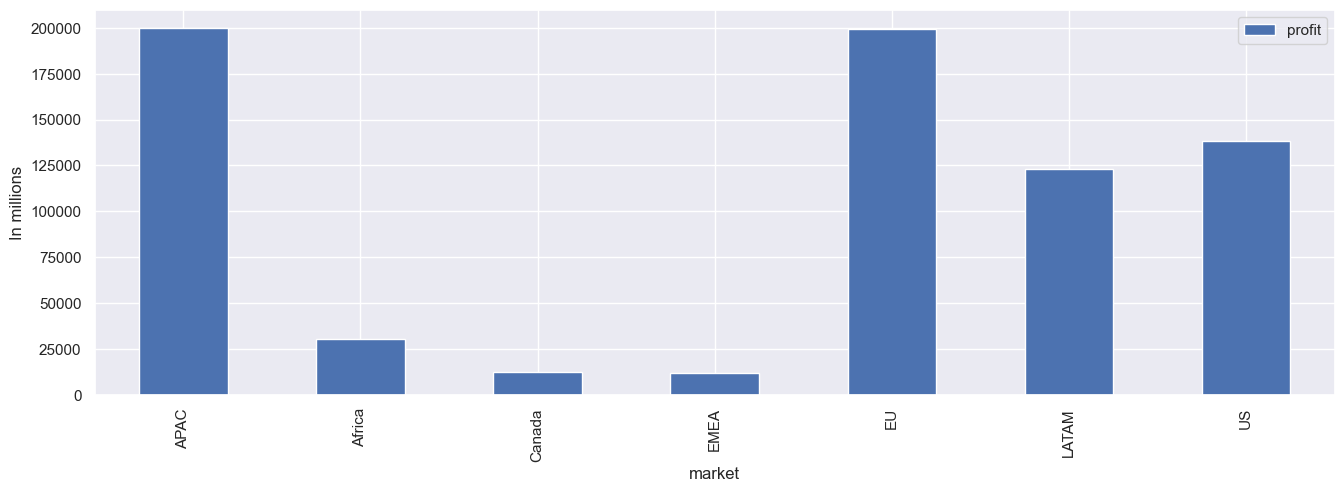

In [136]:
profits_market = df.groupby('market').sum()[['profit']]
profits_market.plot(kind='bar',figsize=(16,5))
plt.ylabel("In millions")

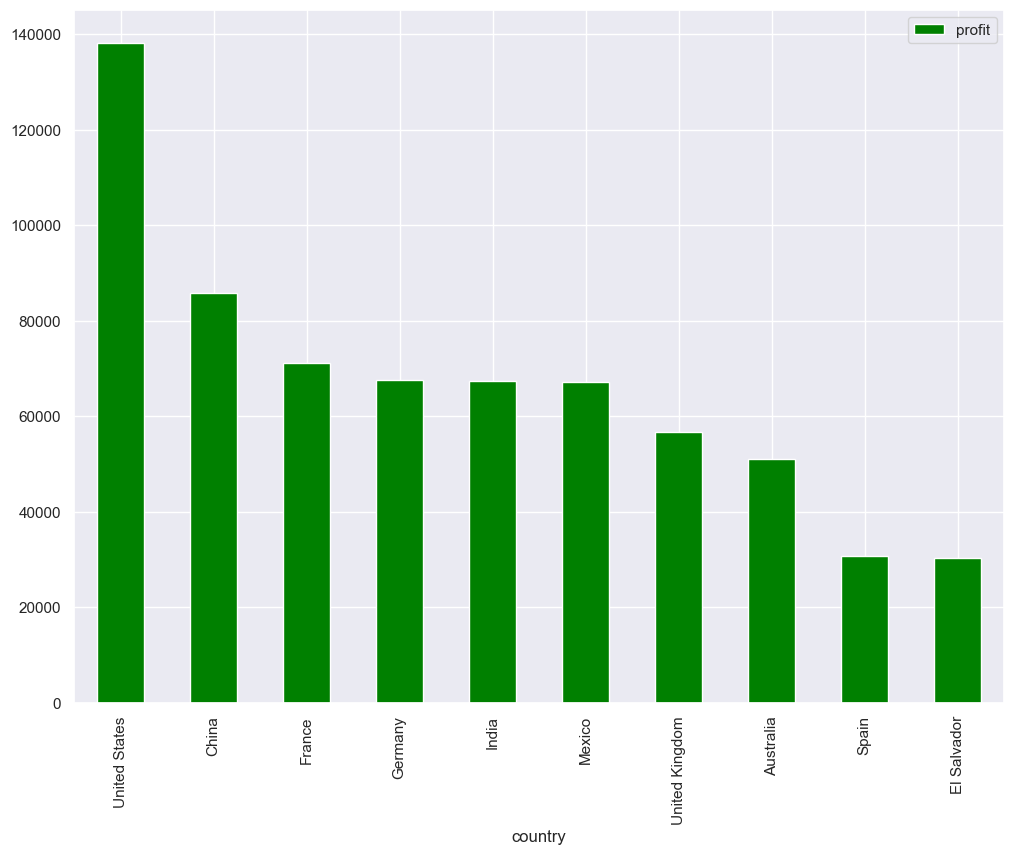

In [139]:
df.groupby(['country']).sum()[['profit']].sort_values(by="profit",ascending=False).nlargest(n=10, columns=['profit']).plot.bar(color="green")
plt.show()

In [141]:
top_selling_product=pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])
top_selling_product.sort_values('quantity',ascending=False)[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",293
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Stanley Pencil Sharpener, Water Color",242
"Acco Index Tab, Clear",228


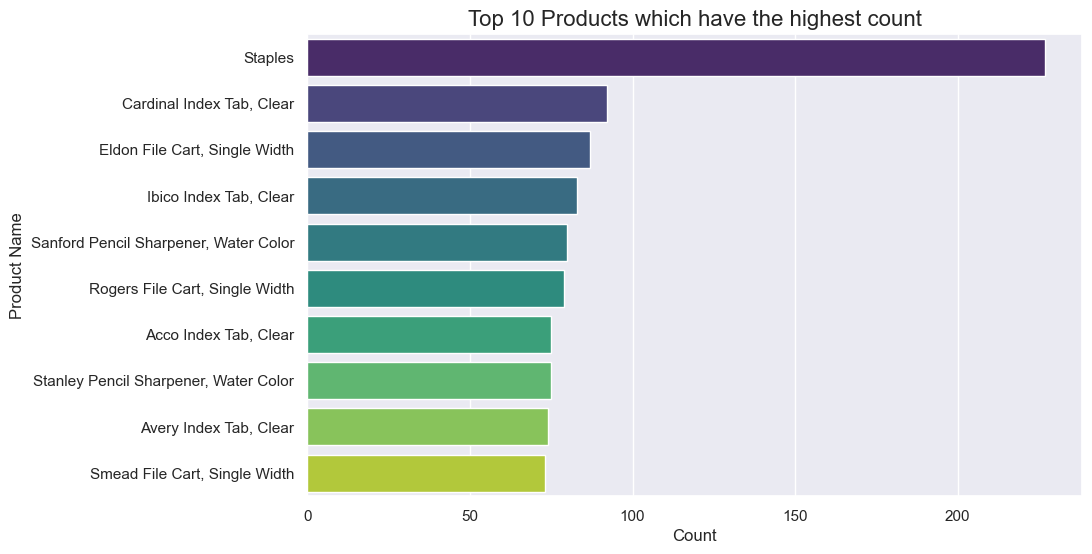

In [142]:
plt.figure(figsize=(10, 6))
sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Products which have the highest count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.show()

### Profit / Loss

In [160]:
df_profit=df[df['profit'] > 0]

In [162]:
df_profit.shape

(35914, 21)

In [163]:
df_loss=df[df['profit'] < 0]

In [164]:
df_loss.shape

(12108, 21)

In [168]:
total_profit = df_profit['profit'].sum()
print("Total_profit = %.2f"%total_profit)

Total_profit = 1425420.41


In [167]:
total_loss=np.negative(df_loss['profit'].sum())
print("Total_loss = %.2f" %total_loss)

Total_loss = 710690.23


In [169]:
Net_Profit = total_profit - total_loss
print(Net_Profit)

714730.1747800001


In [170]:
dfnp=pd.DataFrame({'Total_Profit': {0: 2389392},
                            'Total_loss':{0: 920357},
                            '         ':{0: '='},
                            'Net_Profit':{0: 1469035}})

In [171]:
dfnp

,Total_Profit,Total_loss,,Net_Profit
0,2389392,920357,=,1469035


<AxesSubplot:>

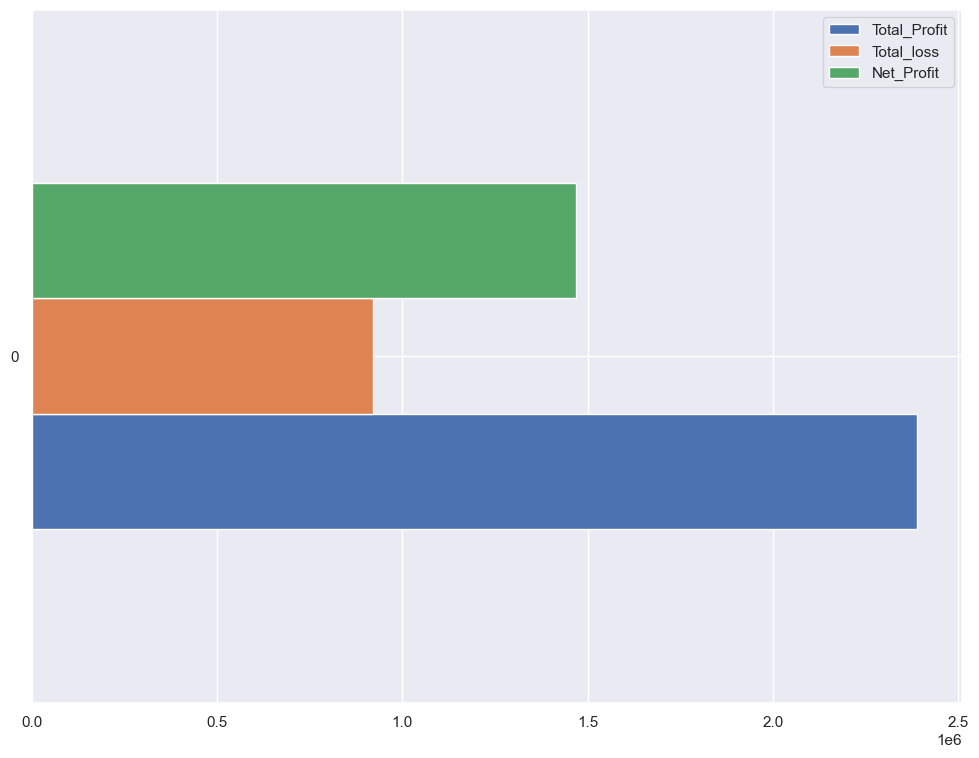

In [172]:
dfnp.plot(kind='barh')

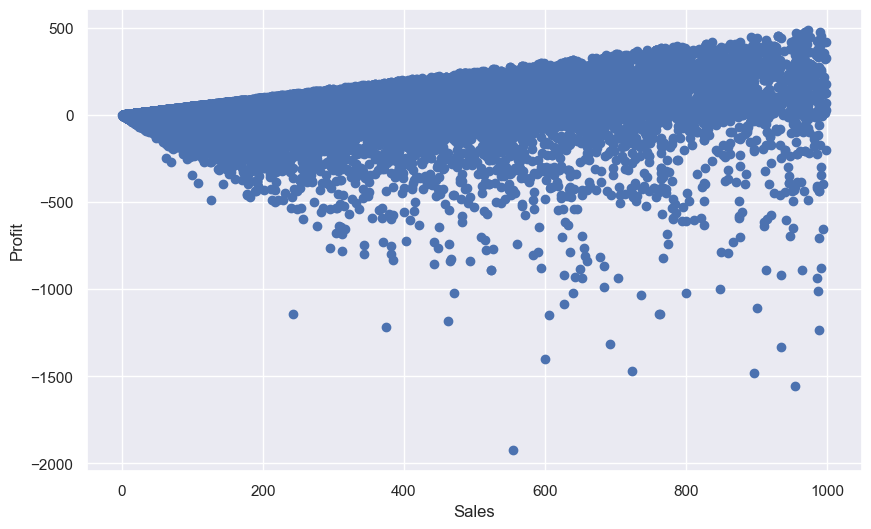

In [177]:
plt.figure(figsize = (10 , 6))
plt.scatter(df["sales"] , df["profit"])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

Thank You

In [183]:
#df.to_csv('out.csv',index=False)